In [10]:
try:
    import torch
    print("successfully imported torch")
    print(torch.__version__)
except ImportError:
    !! pip install torch torchvision torchaudio --user --index-url https://download.pytorch.org/whl/cpu
    print("completed installing torch")

successfully imported torch
2.6.0+cu124


In [11]:
try:
    import numpy as np
    print("successfully imported numpy")
    print(np.__version__)
except ImportError:
    !! pip install numpy --user --upgrade
    print("completed installing numpy")

successfully imported numpy
1.26.4


In [12]:
try:
    from matplotlib import pyplot as plt
    print("successfully imported matplotlib")
except ImportError:
    !! pip install matplotlib --user --upgrade
    print("completed installing matplotlib")

successfully imported matplotlib


In [13]:
!! pip install aenet-gpr --user --upgrade
print("completed installing aenet-gpr")

! pip show aenet-gpr

completed installing aenet-gpr
Name: aenet-gpr
Version: 1.2.9
Summary: Atomistic simulation tools based on Gaussian Processes Regression
Home-page: https://github.com/atomisticnet/aenet-gpr
Author: In Won Yeu
Author-email: iy2185@columbia.edu
License: MPL-2.0
Location: /data/home/iy2185/.local/lib/python3.12/site-packages
Requires: ase, dscribe
Required-by: 


In [14]:
import os, sys, site
sys.path.append(site.USER_SITE)

import aenet_gpr
print(aenet_gpr.__version__)

1.2.9


In [15]:
from IPython.display import Image

try:
    import ase.io
    print("successfully imported ase")
except ImportError:
    !! pip install ase --user --upgrade
    print("completed installing ASE")
    
    import ase.io
    print("successfully imported ase")

successfully imported ase


# 1. Prepare training/test data

We are using train/test HSE06 data of EC dimer prepared in `aenet-gpr/example/2_EC-EC/`

In [16]:
import os.path

! rm -rf 2_EC-EC
! mkdir 2_EC-EC
    
if os.path.isfile("../example/2_EC-EC/train_set_tutorial.zip"):
    ! unzip -oq ../example/2_EC-EC/train_set_tutorial.zip -d ./2_EC-EC/
    print("number of train data:")
    ! find ./2_EC-EC/train_set_tutorial/ -type f | wc -l
else:
    ! wget https://github.com/atomisticnet/aenet-gpr/raw/refs/heads/main/example/2_EC-EC/train_set_tutorial.zip
    ! unzip -oq train_set_tutorial.zip -d ./2_EC-EC/
    ! rm train_set_tutorial.zip
    print("number of train data:")
    ! find ./2_EC-EC/train_set_tutorial/ -type f | wc -l

--2025-05-25 21:41:58--  https://github.com/atomisticnet/aenet-gpr/raw/refs/heads/main/example/2_EC-EC/train_set_tutorial.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/atomisticnet/aenet-gpr/refs/heads/main/example/2_EC-EC/train_set_tutorial.zip [following]
--2025-05-25 21:41:58--  https://raw.githubusercontent.com/atomisticnet/aenet-gpr/refs/heads/main/example/2_EC-EC/train_set_tutorial.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 101063 (99K) [application/zip]
Saving to: ‘train_set_tutorial.zip’

train_set_tutorial. 100%[===================>]  98.69K  --.-KB/s    in 0.002s  

2025

In [17]:
if os.path.isfile("../example/2_EC-EC/test_set_tutorial.zip"):
    ! unzip -oq ../example/2_EC-EC/test_set_tutorial.zip -d ./2_EC-EC/
    print("number of test data:")
    ! find ./2_EC-EC/test_set_tutorial/ -type f | wc -l
else:
    ! wget https://github.com/atomisticnet/aenet-gpr/raw/refs/heads/main/example/2_EC-EC/test_set_tutorial.zip
    ! unzip -oq test_set_tutorial.zip -d ./2_EC-EC/
    ! rm test_set_tutorial.zip
    print("number of test data:")
    ! find ./2_EC-EC/test_set_tutorial/ -type f | wc -l

--2025-05-25 21:42:00--  https://github.com/atomisticnet/aenet-gpr/raw/refs/heads/main/example/2_EC-EC/test_set_tutorial.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/atomisticnet/aenet-gpr/refs/heads/main/example/2_EC-EC/test_set_tutorial.zip [following]
--2025-05-25 21:42:00--  https://raw.githubusercontent.com/atomisticnet/aenet-gpr/refs/heads/main/example/2_EC-EC/test_set_tutorial.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 148252 (145K) [application/zip]
Saving to: ‘test_set_tutorial.zip’

test_set_tutorial.z 100%[===================>] 144.78K  --.-KB/s    in 0.003s  

2025-05

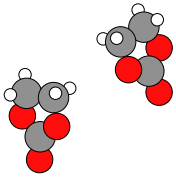

In [18]:
atoms = ase.io.read("./2_EC-EC/test_set_tutorial/file_0000.xsf")
ase.io.write('2EC.png', atoms)
Image("2EC.png")

# 2-1. Train–Test with default kernel parameters (scale 0.4, weight 1.0)

In addition to the reference data files, following configuration file `train.in` is all you need to run aenet-gpr. 

First, let us check the GPR evaluation error for test set with default kernel parameters.

In [ ]:
! rm -f train.in

if os.path.isfile("../example/2_EC-EC/train.in"):
    ! cp ../example/2_EC-EC/train.in .
else:
    ! wget https://github.com/atomisticnet/aenet-gpr/raw/refs/heads/main/example/2_EC-EC/train.in

In [ ]:
! cat train.in

In [ ]:
! python -m aenet_gpr train.in

# 2-2. Visualize the results

In [ ]:
energy_test_gpr = np.load("./energy_test_gpr.npy")
energy_test_reference = np.load("./energy_test_reference.npy")
force_test_gpr = np.load("./force_test_gpr.npy")
force_test_reference = np.load("./force_test_reference.npy")
uncertainty_test_gpr = np.load("./uncertainty_test_gpr.npy")

In [ ]:
diff_per_atom = (energy_test_reference - energy_test_gpr) / 20

print(diff_per_atom.min(), diff_per_atom.max())

In [ ]:
fig = plt.figure(figsize=(7, 6))
ax2 = fig.subplots()

font_x = {'size': 20, 'color': 'black'}
font_y = {'size': 20, 'color': 'black'}
font_tick = {'size': 16, 'color': 'black'}


# The second plot
counts, bins = np.histogram(diff_per_atom, bins=30, range=(-0.003, 0.03))

ax2.hist(bins[:-1], bins, weights=counts, facecolor='dimgray', alpha=1.0, edgecolor='black')

ax2.set_xlabel("DFT $-$ GPR (eV/atom)", fontdict=font_x)
ax2.set_xlim([-0.003, 0.03])
x_labels = [round(label, 2) for label in ax2.get_xticks()]
ax2.set_xticks(x_labels)
ax2.set_xlim([-0.003, 0.03])
ax2.set_xticklabels(x_labels, fontdict=font_tick)

ax2.set_ylabel("Number of structures", fontdict=font_y)
ax2.set_ylim([0, 50])
y_labels = [int(label) for label in ax2.get_yticks()]
ax2.set_yticks(y_labels)
ax2.set_ylim([0, 50])
ax2.set_yticklabels(y_labels, fontdict=font_tick)

[x.set_linewidth(1.5) for x in ax2.spines.values()]
ax2.tick_params(bottom=False, top=True, left=True, right=True)
ax2.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False)
ax2.tick_params(direction='in', length=8, width=1.5)

ax2.grid(True, which='both', linestyle=':', linewidth=0.7, alpha=0.7)

fig.tight_layout()
plt.show()

# 3-1. Train–Test (scale 1.5, weight 1.0)

Since, the constructed GPR with default parameters underestimates energy, let us change the parameters.

In [ ]:
! sed -i '15s|.*|scale 1.5|' train.in

In [ ]:
! cat train.in

In [ ]:
! python -m aenet_gpr train.in

By changing the scale parameter from 0.4 to 1.5, 

 - total energy error is reduced from 0.17 eV to 0.04 eV
 - uncertainty estimate is reduced from 0.084 to 0.002

# 3-2. Visualize the test results

In [ ]:
energy_test_gpr = np.load("./energy_test_gpr.npy")
energy_test_reference = np.load("./energy_test_reference.npy")
force_test_gpr = np.load("./force_test_gpr.npy")
force_test_reference = np.load("./force_test_reference.npy")
uncertainty_test_gpr = np.load("./uncertainty_test_gpr.npy")

In [ ]:
diff_per_atom = (energy_test_reference - energy_test_gpr) / 20

print(diff_per_atom.min(), diff_per_atom.max())

In [ ]:
fig = plt.figure(figsize=(7, 6))
ax2 = fig.subplots()

font_x = {'size': 20, 'color': 'black'}
font_y = {'size': 20, 'color': 'black'}
font_tick = {'size': 16, 'color': 'black'}


# The second plot
counts, bins = np.histogram(diff_per_atom, bins=30, range=(-0.003, 0.03))

ax2.hist(bins[:-1], bins, weights=counts, facecolor='dimgray', alpha=1.0, edgecolor='black')

ax2.set_xlabel("DFT $-$ GPR (eV/atom)", fontdict=font_x)
ax2.set_xlim([-0.003, 0.03])
x_labels = [round(label, 2) for label in ax2.get_xticks()]
ax2.set_xticks(x_labels)
ax2.set_xlim([-0.003, 0.03])
ax2.set_xticklabels(x_labels, fontdict=font_tick)

ax2.set_ylabel("Number of structures", fontdict=font_y)
ax2.set_ylim([0, 50])
y_labels = [int(label) for label in ax2.get_yticks()]
ax2.set_yticks(y_labels)
ax2.set_ylim([0, 50])
ax2.set_yticklabels(y_labels, fontdict=font_tick)

[x.set_linewidth(1.5) for x in ax2.spines.values()]
ax2.tick_params(bottom=False, top=True, left=True, right=True)
ax2.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False)
ax2.tick_params(direction='in', length=8, width=1.5)

ax2.grid(True, which='both', linestyle=':', linewidth=0.7, alpha=0.7)

fig.tight_layout()
plt.show()

# 4. Augment

So, using these parameters, augment step will be executed.

In [ ]:
! sed -i '3s|.*|# Test_file ./2_EC-EC/test_set_tutorial/file_*.xsf|' train.in
! sed -i '25s|.*|Additional_write True|' train.in
! sed -i '28s|.*|Disp_length 0.05|' train.in
! sed -i '29s|.*|Num_copy 2|' train.in

In [ ]:
! cat train.in

In [ ]:
! rm -rf additional_xsf/
! python -m aenet_gpr train.in

Now, 160 new data have been augmented

In [ ]:
! cd ./additional_xsf/ && ls

Their structures are perturbed from reference training data and their energy tags are given from the GPR predictions

In [ ]:
! cd ./additional_xsf/ && cat file_00015.xsf

In [ ]:
! cd ./additional_xsf/ && cat file_00016.xsf